<a href="https://colab.research.google.com/github/tracyhua2/SYS3034-BaseballCase/blob/main/Code/BaseballDraft_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install six

In [105]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from six import StringIO
from IPython.display import Image
import pydotplus

player_url = "https://raw.githubusercontent.com/tracyhua2/SYS3034-BaseballCase/refs/heads/main/Data/player_data.csv"
player = pd.read_csv(player_url)

player.head()

,Player,Player #,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,BA,OBP,SLG
0,"6,125,000",1,688,113,204,37,19,16,68,56,15,66,0.297,0.358,0.475
1,"18,000,000",2,686,103,213,20,7,6,42,43,4,51,0.310,0.361,0.386
2,"4,000,000",3,661,93,186,33,1,8,57,19,6,56,0.281,0.334,0.371
3,"1,750,000",4,653,118,213,54,2,17,83,20,1,50,0.326,0.376,0.493
4,"13,054,526",5,645,102,183,36,2,12,82,10,0,55,0.284,0.339,0.402


In [71]:
player.shape

(50, 15)

In [72]:
feature_cols = ['AB', 'R', 'H', '2B','3B','HR','RBI','SB','CS','BB','BA']
X = player[feature_cols] # Features
y = player.OBP # Target variable

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70:30 train:test

In [93]:
# Converting continuous values to discrete classes
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
y_pred = label_encoder.fit_transform(y_pred)

In [94]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [101]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.13333333333333333


In [110]:
player_names = player['Player #'].values
class_names = [str(player_names[i]) for i in range(len(player_names))]

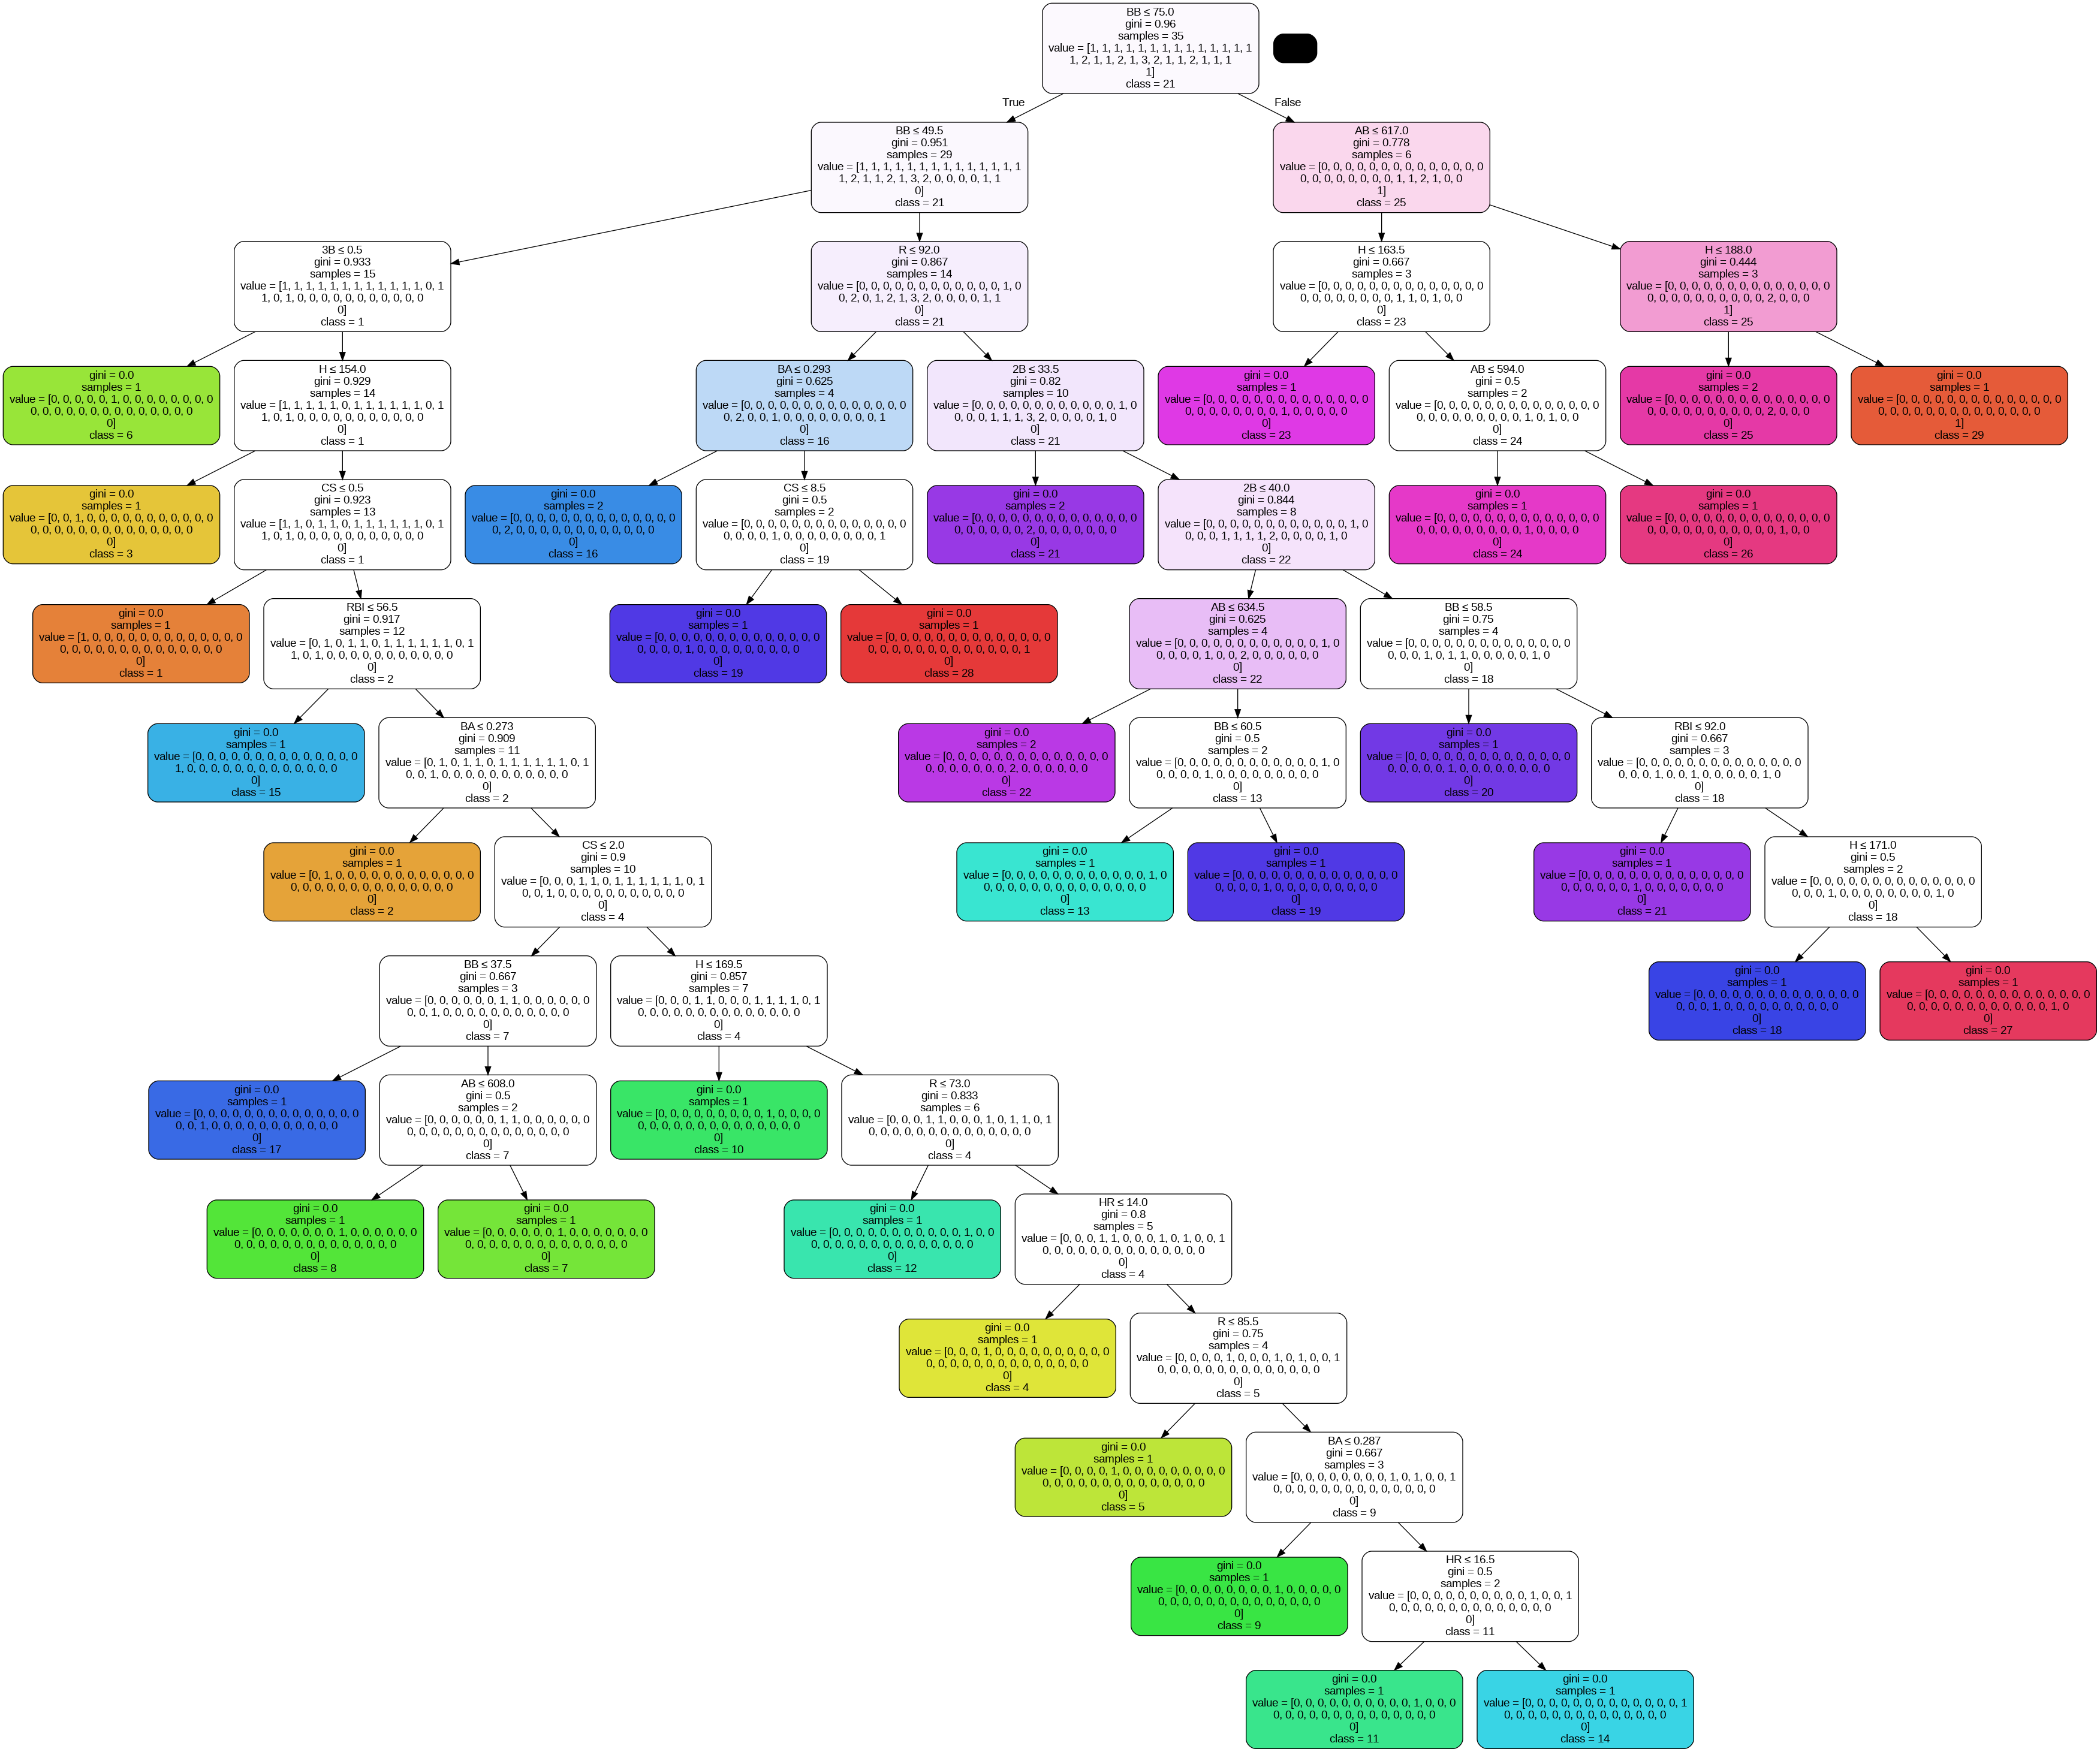

In [111]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=class_names)  # Use player names as class labels

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())